<img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">

<center>
    <h1>ILI285/INF285 Computación Científica </h1>
    <h1>COP-R</h1>
    <h1>Initial Value Problem</h1>
</center>

Necesitamos encontrar una aproximación numérica de la siguiente Ecuación Diferencial Ordinaria de segundo orden para $t\in[0,T]$:

\begin{equation}
\begin{split}
y''(t) + y(t) &= 0,\\
y(0)=1,\; y'(0) &=0
\end{split}
\end{equation}

Antes de aplicar un método numérico, utilizaremos el siguiente cambio de variables:
\begin{align}
u &= y & \implies \quad u' &= y' =v\\
v &= y'& \implies \quad v' &= y''=-y=-u
\end{align}

para así generar $\mathbf{G}(t,\mathbf{u})=(v, -u)$, con $\mathbf{u}=(u,v)$. Por simplicidad se omite la variable temporal, pero tanto $u$ como $v$ dependen de $t$. Ahora, nuestro problema se puede reescribir de la siguiente manera:

\begin{equation}
\dot{\mathbf{u}} = 
\begin{bmatrix}
\dfrac{du}{dt} \\ \dfrac{dv}{dt} 
\end{bmatrix} = 
\begin{bmatrix}
v \\ -u
\end{bmatrix} =
\mathbf{G}(t,\mathbf{u}).\tag{1}
\end{equation}

El problema $(1)$ puede ser resuelto numéricamente utilizando la regla del trapecio. Este método debe resolver la siguiente ecuación en cada iteración para $\mathbf{u}_{n+1}$:

\begin{equation}
\begin{split}
t_{n+1} &= t_{n} + h \\
\mathbf{u}_{n+1} &= \mathbf{u}_n + \frac{h}{2} 
\left(\mathbf{G}(t_n, \mathbf{u}_{n}) + \mathbf{G}(t_{n+1},\mathbf{u}_{n+1})\right)
\end{split}
\end{equation}

donde $t_n = t_0 + h\,n$, con $n=0, 1, \dots, N$, $h=(t_N - t_0)/N$ y $[t_0=0,t_N=T]$ corresponden a una discretización de la variable temporal. Esta aproximación de la ecuación diferencial ordinaria $(1)$ tiene asociado un error numérico de orden $O(h^2)$, lo que es bastante bueno. En rigor, solo es necesario resolver la segunda ecuación en cada iteración es decir:

\begin{equation}
\mathbf{u}_{n+1} - \mathbf{u}_n - \frac{h}{2} 
\left(\mathbf{G}(t_n, \mathbf{u}_{n}) + \mathbf{G}(t_{n+1},\mathbf{u}_{n+1})\right) = \mathbf{0},
\end{equation}

donde $\mathbf{u}_{n+1}$ es nuestro vector de incógnitas $(u_{n+1}, v_{n+1})$ y $\mathbf{u}_{n}=(u_n,v_n)$ son valores conocidos en la interación $n$. Otra forma de ver el problema es la siguiente:

\begin{equation}
\mathbf{F}(\mathbf{u}_{n+1}, \mathbf{u}_n) = \mathbf{0},
\end{equation}

la cual debe resolverse para cada iteración $n$, es decir, dado $\mathbf{u}_n$ debemos obtener $\mathbf{u}_{n+1}$.

**Consideración**: Este tipo de sistema dinámico se denomina autónomo porque si bien $u$ y $v$ dependen de $t$, no hay un efecto directo de $t$ en la función definida como $\mathbf{G}(t, \mathbf{u})$ por lo que se puede omitir y solo considerar $\mathbf{G}(\mathbf{u})$.

**Preguntas**
1. Obtenga $\|\mathbf{G}(\mathbf{u}_0)\|_2$, donde $\mathbf{u}_0=(u_0,v_0)=(y(0), y'(0))$
2. Obtenga $v_1$, considerando $t_0=0$, $t_N=2\pi$ y $N=50$, $\mathbf{u}_0=(u_0,v_0)=(y(0), y'(0))$.
3. Obtenga $u_{30}$, considerando $t_0=0$, $t_N=2\pi$ y $N=50$, $\mathbf{u}_0=(u_0,v_0)=(y(0), y'(0))$. 

## Resolución

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definición de $\mathbf{G}(\mathbf{u})=(v, -u)$

In [2]:
def G(u):
    return np.array([u[1], -u[0]])

### Definición de $\mathbf{F}(\mathbf{u}_{n+1}, \mathbf{u}_n)$

\begin{equation}
    \begin{split}
        \mathbf{F}(\mathbf{u}_{n+1}, \mathbf{u}_n) & = \mathbf{u}_{n+1} - \mathbf{u}_n - \frac{h}{2} 
            \left(\mathbf{G}(t_n, \mathbf{u}_{n}) + \mathbf{G}(t_{n+1},\mathbf{u}_{n+1})\right) \\
            &= 
            \begin{bmatrix}
                u_{n+1} - u_{n} - 0.5\,h\,(v_n + v_{n+1})  \\ 
                v_{n+1} - v_{n} + 0.5\,h\,(u_n + u_{n+1})
            \end{bmatrix}\\
            &= 
            \begin{bmatrix}
                1 & -0.5\, h \\ 
                0.5\, h & 1
            \end{bmatrix}
            \begin{bmatrix}
                u_{n+1} \\ v_{n+1}
            \end{bmatrix} -
            \begin{bmatrix}
                u_{n} + 0.5\,h v_{n} \\
                v_{n} - 0.5\,h u_{n} \\
            \end{bmatrix}
    \end{split}
\end{equation}

Como $\mathbf{F}(\mathbf{u}_{n+1}, \mathbf{u}_n)=\mathbf{0}$, esto no es más que un sistema de ecuaciones lineales

\begin{equation}
    \begin{split}
        \begin{bmatrix}
            1 & -0.5\, h \\ 
            0.5\, h & 1
        \end{bmatrix}
        \begin{bmatrix}
            u_{n+1} \\ v_{n+1}
        \end{bmatrix} &=
        \begin{bmatrix}
            u_{n} + 0.5\,h v_{n} \\
            v_{n} - 0.5\,h u_{n} \\
        \end{bmatrix} \\
        A\,\mathbf{x} &=\mathbf{b}
    \end{split}
\end{equation}

### Regla del Trapecio

Implementación de la **regla del trapecio**. Considerar que $A$ es fijo y solo depende de $h$. Además, 
$\mathbf{b}$ se debe actualizar en cada iteración ya que depende de los valores de $\mathbf{u}_n$ y $\mathbf{G}(\mathbf{u}_n)$.

In [3]:
def solveIVP(G, t, u0):
    N = t.shape[0]
    U = np.zeros((N, 2))
    U[0] = u0
    h = t[1] - t[0]
    A = np.array([[1, -0.5 * h], [0.5 * h, 1]])
    for n in range(N - 1):
        b = U[n] + 0.5 * h * G(U[n])
        U[n+1] = np.linalg.solve(A, b)
    return U

### Solución analítica

In [4]:
y = lambda t: np.cos(t)

### Solución Numérica

In [5]:
N = 50
t_0, t_N = 0, 2 * np.pi
t = np.linspace(t_0, t_N, N + 1)
u0 = np.array([1, 0])

In [6]:
U = solveIVP(G, t, u0)

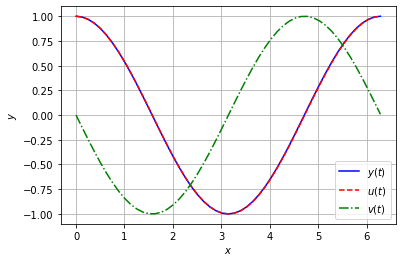

In [7]:
plt.plot(t, y(t), 'b-', label=r"$y(t)$")
plt.plot(t, U[:,0], 'r--', label=r"$u(t)$")
plt.plot(t, U[:,1], 'g-.', label=r"$v(t)$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.legend()
plt.show()

### Preguntas

1. Obtenga $\|\mathbf{G}(\mathbf{u}_0)\|_2$, donde $\mathbf{u}_0=(u_0,v_0)=(y(0), y'(0))$.

In [8]:
print(np.linalg.norm(G(u0)))

1.0


2. Obtenga $v_1$, considerando $t_0=0$, $t_N=2\pi$ y $N=50$, $\mathbf{u}_0=(u_0,v_0)=(y(0), y'(0))$. 

In [9]:
print(U[1, 1])

-0.1251695565411434


3. Obtenga $u_{30}$, considerando $t_0=0$, $t_N=2\pi$ y $N=50$, $\mathbf{u}_0=(u_0,v_0)=(y(0), y'(0))$. 

In [10]:
print(U[30, 0])

-0.8119161913150047
